In [2]:
#In this code Multilingual dataset is used along with text preprocessing, tokenization, tfidf vectorization. 5-6 models are already added

In [4]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
data= pd.read_csv(r'D:\StressDetection\sentiment_analysis_term_train.csv')

# Copy
stress=data.copy()

# Data
stress.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,neg
1,बैटरी लाइफ बहुत बढिया है।,pos
2,हकीकत ये है कि मेटल के नाम पर फोन में सिर्फ चा...,neu
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,pos
4,अच्छी बैटरी क्षमता है।,pos


In [5]:
# Info
stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2497 entries, 0 to 2496
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2497 non-null   object
 1   label   2497 non-null   object
dtypes: object(2)
memory usage: 39.1+ KB


In [6]:
# Checking null values
stress.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
# Statistical Information
stress.describe()

,text,label
count,2497,2497
unique,2497,3
top,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,pos
freq,1,1147


In [8]:
import pandas as pd
from transformers import MarianMTModel, MarianTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [9]:
model_name = "Helsinki-NLP/opus-mt-mul-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [10]:
# Translate text from any supported language to English
def translate(text, source_lang="auto"):
    try:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, source_lang=source_lang)
        outputs = model.generate(**inputs)
        translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return translated_text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

In [11]:
# Delete rows with 'neu' label
data = data[data['label'] != 'neu']

# Convert 'pos' to 1 and 'neg' to 0
data['label'] = data['label'].map({'pos': 1, 'neg': 0})

# Print the resulting DataFrame
data.head()

,text,label
0,हमें इससे बेहतर ब्राइटनेस वाले टेबलेट देखने को...,0
1,बैटरी लाइफ बहुत बढिया है।,1
3,स्लोफो एक मनोरंजक एप्लिकेशन है इसमें कोई दो रा...,1
4,अच्छी बैटरी क्षमता है।,1
5,बैटरी लाइफ की बात करें तो हमारे लगातार वीडियो ...,1


In [12]:
from googletrans import Translator

# Initialize translator
translator = Translator()

# Function to translate text
def translate_text(text, source_lang):
    try:
        translation = translator.translate(text, src=source_lang, dest='en')
        return translation.text
    except Exception as e:
        print(f"Translation error: {e}")
        return None

# Apply translation using Google Translate
data['text'] = data.apply(lambda row: translate_text(row['text'], source_lang="hi"), axis=1)

# Remove rows with translation errors
data = data.dropna(subset=['text'])


Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translation error: 'NoneType' object has no attribute 'group'
Translat

In [13]:
# Array
import numpy as np

# Dataframe
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

#Data Reading
stress_c= pd.read_csv(r'D:\StressDetection\Stress.csv')

# Copy
stress=stress_c.copy()

# Data
stress.head()

,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8,1521614353
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0,1527009817
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8,1535935605
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6,1516429555
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8,1539809005


In [14]:
# Select only 'text' and 'label' columns
stress = stress[['text', 'label']]

# Print the resulting DataFrame
stress.head()

,text,label
0,"He said he had not felt that way before, sugge...",1
1,"Hey there r/assistance, Not sure if this is th...",0
2,My mom then hit me with the newspaper and it s...,1
3,"until i met my new boyfriend, he is amazing, h...",1
4,October is Domestic Violence Awareness Month a...,1


In [15]:
# Concatenate the rows of 'stree' onto 'data'
merged_data = pd.concat([data, stress], ignore_index=True)

# Print the concatenated DataFrame
print(merged_data)

                                                   text  label
0     He said he had not felt that way before, sugge...      1
1     Hey there r/assistance, Not sure if this is th...      0
2     My mom then hit me with the newspaper and it s...      1
3     until i met my new boyfriend, he is amazing, h...      1
4     October is Domestic Violence Awareness Month a...      1
...                                                 ...    ...
2833  * Her, a week ago: Precious, how are you? (I i...      0
2834  I don't have the ability to cope with it anymo...      1
2835  In case this is the first time you're reading ...      0
2836  Do you find this normal? They have a good rela...      0
2837  I was talking to my mom this morning and she s...      1

[2838 rows x 2 columns]


In [16]:
# Calculate the percentage of each label
label_counts = merged_data['label'].value_counts(normalize=True) * 100

# Print the percentage of each label
print("Percentage of label 0:", label_counts[0])
print("Percentage of label 1:", label_counts[1])

Percentage of label 0: 47.56871035940804
Percentage of label 1: 52.43128964059197


In [17]:
for label, cmap in zip([0,1],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = merged_data.query('label == @label')['text'].str.cat(sep=' ')
    plt.figure(figsize=(12, 9))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()

ValueError: Only supported for TrueType fonts

<Figure size 864x648 with 0 Axes>

In [18]:
# Regular Expression
import re 

# Handling string
import string

# NLP tool
import spacy

nlp=spacy.load('en_core_web_sm')
from spacy.lang.en.stop_words import STOP_WORDS

# Importing Natural Language Tool Kit for NLP operations
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')                                
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mihika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mihika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mihika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mihika\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
#defining function for preprocessing
def preprocess(text,remove_digits=True):
    text = re.sub('\W+',' ', text)                                       
    text = re.sub('\s+',' ', text)                                       
    text = re.sub("(?<!\w)\d+", "", text)                                
    text = re.sub("-(?!\w)|(?<!\w)-", "", text)                          
    text=text.lower()
    nopunc=[char for char in text if char not in string.punctuation]    
    nopunc=''.join(nopunc)
    nopunc=' '.join([word for word in nopunc.split()
               if word.lower() not in stopwords.words('english')])  
    
    
    return nopunc
# Defining a function for lemitization
def lemmatize(words):
   
    words=nlp(words)
    lemmas = []
    for word in words:
        
        lemmas.append(word.lemma_)
    return lemmas



#converting them into string
def listtostring(s):
    str1=' '
    return (str1.join(s))

def clean_text(input):
    word=preprocess(input)
    lemmas=lemmatize(word)
    return listtostring(lemmas)

In [20]:
# Creating a feature to store clean texts
merged_data['clean_text']=merged_data['text'].apply(clean_text)
merged_data.head()

,text,label,clean_text
0,"He said he had not felt that way before, sugge...",1,say feel way suggete go rest trigger ahead you...
1,"Hey there r/assistance, Not sure if this is th...",0,hey r assistance sure right place post go curr...
2,My mom then hit me with the newspaper and it s...,1,mom hit newspaper shock would know like play h...
3,"until i met my new boyfriend, he is amazing, h...",1,meet new boyfriend amazing kind sweet good stu...
4,October is Domestic Violence Awareness Month a...,1,october domestic violence awareness month dome...


In [21]:
# Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertForSequenceClassification
import torch


# Model Building
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold,train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score
from sklearn.pipeline import Pipeline

# Time
from time import time

In [22]:
# Defining target & feature for ML model building
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
# Self-defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Logistic regression

def model_lr_tf(x_train, x_test, y_train, y_test):
    global acc_lr_tf,f1_lr_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    #fitting training data into the model & predicting
    
    t0 = time()

    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_lr_tf=accuracy_score(y_test,y_pred)
    f1_lr_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time :',time()-t0)
    print('Accuracy: ',acc_lr_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_lr_tf

In [24]:

def model_lr_bow(x_train, x_test, y_train, y_test):
    global acc_lr_bow, f1_lr_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_bow = accuracy_score(y_test, y_pred)
    f1_lr_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_bow


In [45]:

def model_lr_ng(x_train, x_test, y_train, y_test):
    global acc_lr_ng, f1_lr_ng
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer(analyzer = 'word',ngram_range=(1,3), stop_words='english')
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_ng = accuracy_score(y_test, y_pred)
    f1_lr_ng = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_ng)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_ng


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_lr_one_hot(x_train, x_test, y_train, y_test):
    global acc_lr_one_hot, f1_lr_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = LogisticRegression()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_lr_one_hot = accuracy_score(y_test, y_pred)
    f1_lr_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_lr_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_lr_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [77]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, f1_score

# Self-defining function to convert the data into vector form by BERT embedding
# and classify and create model by Logistic regression
def model_lr_bert(x_train, x_test, y_train, y_test):
    global acc_lr_bert, f1_lr_bert

    # Load pre-trained BERT model and tokenizer
    model_name = 'bert-base-uncased'
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

    # Function to encode text using BERT embedding
    def bert_encode(text):
        try:
            tokens = tokenizer.tokenize(text)
            tokens = ['[CLS]'] + tokens + ['[SEP]']
            input_ids = torch.tensor([tokenizer.convert_tokens_to_ids(tokens)]).long()
        
            with torch.no_grad():
                output = model(input_ids)
            last_hidden_states = output[0]
        
            if last_hidden_states.dim() < 2:
                raise ValueError("Unexpected dimensions in last_hidden_states")
        
            return last_hidden_states[:, 0, :].mean(dim=0).detach().numpy()
    
        except Exception as e:
            print("Error occurred during BERT encoding:", e)
            return None



    # Convert text data to BERT embeddings
    x_train_bert = [bert_encode(text) for text in x_train]
    x_test_bert = [bert_encode(text) for text in x_test]

    # Reshape data for Logistic Regression
    x_train_bert = np.array(x_train_bert).reshape(-1, 768)
    x_test_bert = np.array(x_test_bert).reshape(-1, 768)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=64,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=10,
        load_best_model_at_end=True,
        metric_for_best_model='accuracy',
        evaluation_strategy='epoch'
    )

    # Define trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=torch.utils.data.TensorDataset(torch.tensor(x_train_bert), torch.tensor(y_train)),
        eval_dataset=torch.utils.data.TensorDataset(torch.tensor(x_test_bert), torch.tensor(y_test))
    )

    # Train the model
    trainer.train()

    # Evaluate the model
    predictions = trainer.predict(torch.tensor(x_test_bert))
    y_pred = np.argmax(predictions.predictions, axis=1)


    # Model Evaluation
    acc_lr_bert = accuracy_score(y_test, y_pred)
    f1_lr_bert = f1_score(y_test, y_pred, average='weighted')
    print('Accuracy: ', acc_lr_bert)
    print(10 * '===========')
    print('Classification Report: \n', classification_report(y_test, y_pred))

    return y_test, y_pred, acc_lr_bert

In [26]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by MultinomialNB

def model_nb_tf(x_train, x_test, y_train, y_test):
    global acc_nb_tf,f1_nb_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = MultinomialNB()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_nb_tf=accuracy_score(y_test,y_pred)
    f1_nb_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_nb_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_nb_tf


In [27]:

def model_nb_bow(x_train, x_test, y_train, y_test):
    global acc_nb_bow, f1_nb_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = MultinomialNB()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_nb_bow = accuracy_score(y_test, y_pred)
    f1_nb_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_nb_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_nb_bow


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_nb_one_hot(x_train, x_test, y_train, y_test):
    global acc_nb_one_hot, f1_nb_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = MultinomialNB()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_nb_one_hot = accuracy_score(y_test, y_pred)
    f1_nb_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_nb_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_nb_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [29]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Decision Tree
def model_dt_tf(x_train, x_test, y_train, y_test):
    global acc_dt_tf,f1_dt_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = DecisionTreeClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_dt_tf=accuracy_score(y_test,y_pred)
    f1_dt_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_dt_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))
    
    
    return y_test,y_pred,acc_dt_tf

In [30]:

def model_dt_bow(x_train, x_test, y_train, y_test):
    global acc_dt_bow, f1_dt_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = DecisionTreeClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_dt_bow = accuracy_score(y_test, y_pred)
    f1_dt_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_dt_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_dt_bow


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_dt_one_hot(x_train, x_test, y_train, y_test):
    global acc_dt_one_hot, f1_dt_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = DecisionTreeClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_dt_one_hot = accuracy_score(y_test, y_pred)
    f1_dt_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_dt_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_dt_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [32]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by KNN

def model_knn_tf(x_train, x_test, y_train, y_test):
    global acc_knn_tf,f1_knn_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    ovr = KNeighborsClassifier()
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_knn_tf=accuracy_score(y_test,y_pred)
    f1_knn_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_knn_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [33]:

def model_knn_bow(x_train, x_test, y_train, y_test):
    global acc_knn_bow, f1_knn_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = KNeighborsClassifier()
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_knn_bow = accuracy_score(y_test, y_pred)
    f1_knn_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_knn_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_knn_bow


In [34]:
# Self defining function to convert the data into vector form by tf idf 
#vectorizer and classify and create model by Random Forest

def model_rf_tf(x_train, x_test, y_train, y_test):
    global acc_rf_tf,f1_rf_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)

    ovr = RandomForestClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_rf_tf=accuracy_score(y_test,y_pred)
    f1_rf_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_rf_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))


In [35]:

def model_rf_bow(x_train, x_test, y_train, y_test):
    global acc_rf_bow, f1_rf_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = RandomForestClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_rf_bow = accuracy_score(y_test, y_pred)
    f1_rf_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_rf_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_rf_bow


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_rf_one_hot(x_train, x_test, y_train, y_test):
    global acc_rf_one_hot, f1_rf_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = RandomForestClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_rf_one_hot = accuracy_score(y_test, y_pred)
    f1_rf_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_rf_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_rf_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [37]:
# Self defining function to convert the data into vector form by tf idf
# vectorizer and classify and create model by Adaptive Boosting

def model_ab_tf(x_train, x_test, y_train, y_test):
    global acc_ab_tf,f1_ab_tf
    # Text to vector transformation 
    vector = TfidfVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
    

    
    ovr = AdaBoostClassifier(random_state=1)
    
    #fitting training data into the model & predicting
    t0 = time()
    
    ovr.fit(x_train, y_train)
    
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    
    conf=confusion_matrix(y_test,y_pred)
    acc_ab_tf=accuracy_score(y_test,y_pred)
    f1_ab_tf=f1_score(y_test,y_pred,average='weighted')
    print('Time : ',time()-t0)
    print('Accuracy: ',acc_ab_tf)
    print(10*'===========')
    print('Confusion Matrix: \n',conf)
    print(10*'===========')
    print('Classification Report: \n',classification_report(y_test,y_pred))

In [38]:

def model_ab_bow(x_train, x_test, y_train, y_test):
    global acc_ab_bow, f1_ab_bow
    # Text to vector transformation using Bag of Words
    vector = CountVectorizer()
    x_train = vector.fit_transform(x_train)
    x_test = vector.transform(x_test)
 
    ovr = AdaBoostClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train, y_train)
    y_pred = ovr.predict(x_test)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_ab_bow = accuracy_score(y_test, y_pred)
    f1_ab_bow = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_ab_bow)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from time import time

def model_ab_one_hot(x_train, x_test, y_train, y_test):
    global acc_ab_one_hot, f1_ab_one_hot
    
    # Convert categorical variables to one-hot encoded features
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_reshaped = x_train.values.reshape(-1, 1)
    x_test_reshaped = x_test.values.reshape(-1, 1)
    x_train_encoded = encoder.fit_transform(x_train_reshaped)
    x_test_encoded = encoder.transform(x_test_reshaped)
 
    ovr = AdaBoostClassifier(random_state=1)
    
    # Fitting training data into the model & predicting
    t0 = time()
    ovr.fit(x_train_encoded, y_train)
    y_pred = ovr.predict(x_test_encoded)
    
    # Model Evaluation
    conf = confusion_matrix(y_test, y_pred)
    acc_ab_one_hot = accuracy_score(y_test, y_pred)
    f1_ab_one_hot = f1_score(y_test, y_pred, average='weighted')
    
    print('Time:', time() - t0)
    print('Accuracy:', acc_ab_one_hot)
    print(10 * '===========')
    print('Confusion Matrix:\n', conf)
    print(10 * '===========')
    print('Classification Report:\n', classification_report(y_test, y_pred))
    
    return y_test, y_pred, acc_ab_one_hot

# Example usage:
# y_test, y_pred, acc_lr_one_hot = model_lr_one_hot(x_train, x_test, y_train, y_test)


In [78]:
# Evaluating Models

print('********************Logistic Regression*********************')
print('\n')
model_lr_tf(x_train, x_test, y_train, y_test)
model_lr_bow(x_train, x_test, y_train, y_test)
model_lr_one_hot(x_train,x_test,y_train,y_test)
model_lr_bert(x_train,x_test,y_train,y_test)

print('\n')
print(30*'==========')
print('\n')
print('********************Multinomial NB*********************')
print('\n')
model_nb_tf(x_train, x_test, y_train, y_test)
model_nb_bow(x_train,x_test,y_train,y_test)
model_nb_one_hot(x_train,x_test,y_train,y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Decision Tree*********************')
print('\n')
model_dt_tf(x_train, x_test, y_train, y_test)
model_dt_bow(x_train, x_test, y_train, y_test)
model_dt_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Random Forest Bagging*********************')
print('\n')
model_rf_tf(x_train, x_test, y_train, y_test)
model_rf_bow(x_train, x_test, y_train, y_test)
model_rf_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Adaptive Boosting*********************')
print('\n')
model_ab_tf(x_train, x_test, y_train, y_test)
model_ab_bow(x_train, x_test, y_train, y_test)
model_ab_one_hot(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')
print('********************Logistic Regression BOW*********************')
print('\n')
model_lr_bow(x_train, x_test, y_train, y_test)
print('\n')
print(30*'==========')
print('\n')

********************Logistic Regression*********************


Time : 0.03396248817443848
Accuracy:  0.7341549295774648
Confusion Matrix: 
 [[181  69]
 [ 82 236]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       250
           1       0.77      0.74      0.76       318

    accuracy                           0.73       568
   macro avg       0.73      0.73      0.73       568
weighted avg       0.74      0.73      0.73       568

Time: 0.9368011951446533
Accuracy: 0.7147887323943662
Confusion Matrix:
 [[183  67]
 [ 95 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       250
           1       0.77      0.70      0.73       318

    accuracy                           0.71       568
   macro avg       0.71      0.72      0.71       568
weighted avg       0.72      0.71      0.72       568

Time: 0.015630006790161133
Accuracy: 0

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too many indices for tensor of dimension 2
Error occurred during BERT encoding: too

ValueError: cannot reshape array of size 2270 into shape (768)

In [47]:
# Creating tabular format for better comparison
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Logistic Regresion','Multinomial NB',
            'Decision Tree','Random Forest','Adaptive Boosting','One-Hot-LR','BOW-LR','MB-BOW','MB-OH','DT-BOW','DT-OH','RF-BOW','RF-OH','AB-BOW','AB-OH','LR-NG'])
tbl['Accuracy']=pd.Series([acc_lr_tf,acc_nb_tf,acc_dt_tf,
                  acc_rf_tf,acc_ab_tf,acc_lr_one_hot,acc_lr_bow,acc_nb_bow,acc_nb_one_hot,acc_dt_bow,acc_dt_one_hot,acc_rf_bow,acc_rf_one_hot,acc_ab_bow,acc_ab_one_hot,acc_lr_ng])
tbl['F1_Score']=pd.Series([f1_lr_tf,f1_nb_tf,f1_dt_tf,
                  f1_rf_tf,f1_ab_tf,f1_lr_one_hot,f1_lr_bow,f1_nb_bow,f1_nb_one_hot,f1_dt_bow,f1_dt_one_hot,f1_rf_bow,f1_rf_one_hot,f1_ab_bow,f1_ab_one_hot,f1_lr_ng])
tbl.set_index('Model')
# Best model on the basis of F1 Score
tbl.sort_values('F1_Score',ascending=False)

,Model,Accuracy,F1_Score
0,Logistic Regresion,0.734155,0.734750
7,MB-BOW,0.739437,0.734744
6,BOW-LR,0.714789,0.715784
15,LR-NG,0.714789,0.715784
1,Multinomial NB,0.727113,0.713342
3,Random Forest,0.697183,0.693266
11,RF-BOW,0.695423,0.692931
4,Adaptive Boosting,0.658451,0.659575
2,Decision Tree,0.640845,0.642133
13,AB-BOW,0.632042,0.633308


In [66]:
print("Logistic Regression")
lr_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding', 'BoW','Bert'],
    'Accuracy': [acc_lr_tf, acc_lr_one_hot, acc_lr_bow,acc_lr_bert],
    'F1_Score': [f1_lr_tf, f1_lr_one_hot, f1_lr_bow,f1_lr_bert]
})
lr_tbl.set_index('Technique')
lr_tbl.sort_values('F1_Score',ascending=False)







Logistic Regression


,Technique,Accuracy,F1_Score
0,TF-IDF,0.734155,0.734750
2,BoW,0.714789,0.715784
3,Bert,0.707746,0.707618
1,One-Hot Encoding,0.566901,0.417571


In [56]:
print("Multinomial Naive Bayes")
nb_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_nb_tf, acc_nb_one_hot,acc_nb_bow],
    'F1_Score': [f1_nb_tf, f1_nb_one_hot,f1_nb_bow]
})
nb_tbl.set_index('Technique')
nb_tbl.sort_values('F1_Score',ascending=False)

Multinomial Naive Bayes


,Technique,Accuracy,F1_Score
2,BoW,0.739437,0.734744
0,TF-IDF,0.727113,0.713342
1,One-Hot Encoding,0.566901,0.417571


In [57]:
print("Decision Tree")
dt_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_dt_tf, acc_dt_one_hot,acc_dt_bow],
    'F1_Score': [f1_dt_tf, f1_dt_one_hot,f1_dt_bow]
})
dt_tbl.set_index('Technique')
dt_tbl.sort_values('F1_Score',ascending=False)


Decision Tree


,Technique,Accuracy,F1_Score
0,TF-IDF,0.640845,0.642133
2,BoW,0.605634,0.605276
1,One-Hot Encoding,0.566901,0.420546


In [59]:
print("Random Forest")
rf_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_rf_tf, acc_rf_one_hot,acc_rf_bow],
    'F1_Score': [f1_rf_tf, f1_rf_one_hot,f1_rf_bow]
})
rf_tbl.set_index('Technique')
rf_tbl.sort_values('F1_Score',ascending=False)


Random Forest


,Technique,Accuracy,F1_Score
0,TF-IDF,0.697183,0.693266
2,BoW,0.695423,0.692931
1,One-Hot Encoding,0.566901,0.417571


In [60]:
print("Adaptive Boosting")
ab_tbl = pd.DataFrame({
    'Technique': ['TF-IDF', 'One-Hot Encoding','BoW'],
    'Accuracy': [acc_ab_tf, acc_ab_one_hot,acc_ab_bow],
    'F1_Score': [f1_ab_tf, f1_ab_one_hot,acc_ab_bow]
})
ab_tbl.set_index('Technique')
ab_tbl.sort_values('F1_Score',ascending=False)


Adaptive Boosting


,Technique,Accuracy,F1_Score
0,TF-IDF,0.658451,0.659575
2,BoW,0.632042,0.632042
1,One-Hot Encoding,0.561620,0.405847


In [63]:
# Concatenate all individual tables
combined_tbl = pd.concat([lr_tbl, nb_tbl, dt_tbl, rf_tbl, ab_tbl], axis=0)

# Sort the table by model names
combined_tbl.sort_index(level=0)
combined_tbl.sort_values('Accuracy',ascending=False)

# Display the combined table
print(combined_tbl)


          Technique  Accuracy  F1_Score
0            TF-IDF  0.734155  0.734750
1  One-Hot Encoding  0.566901  0.417571
2               BoW  0.714789  0.715784
0            TF-IDF  0.727113  0.713342
1  One-Hot Encoding  0.566901  0.417571
2               BoW  0.739437  0.734744
0            TF-IDF  0.640845  0.642133
1  One-Hot Encoding  0.566901  0.420546
2               BoW  0.605634  0.605276
0            TF-IDF  0.697183  0.693266
1  One-Hot Encoding  0.566901  0.417571
2               BoW  0.695423  0.692931
0            TF-IDF  0.658451  0.659575
1  One-Hot Encoding  0.561620  0.405847
2               BoW  0.632042  0.632042



 LogisticRegression()
f1-Score(train): mean= (0.747), min=(0.720)) ,max= (0.782),stdev= (0.020)
f1-Score(test): 0.7466

 MultinomialNB()
f1-Score(train): mean= (0.687), min=(0.636)) ,max= (0.720),stdev= (0.028)
f1-Score(test): 0.6871

 DecisionTreeClassifier(random_state=1)
f1-Score(train): mean= (0.593), min=(0.567)) ,max= (0.643),stdev= (0.026)
f1-Score(test): 0.5936

 KNeighborsClassifier()
f1-Score(train): mean= (0.648), min=(0.615)) ,max= (0.683),stdev= (0.022)
f1-Score(test): 0.6479

 RandomForestClassifier(random_state=1)
f1-Score(train): mean= (0.718), min=(0.701)) ,max= (0.739),stdev= (0.016)
f1-Score(test): 0.7181

 AdaBoostClassifier(random_state=1)
f1-Score(train): mean= (0.663), min=(0.621)) ,max= (0.685),stdev= (0.024)
f1-Score(test): 0.6626


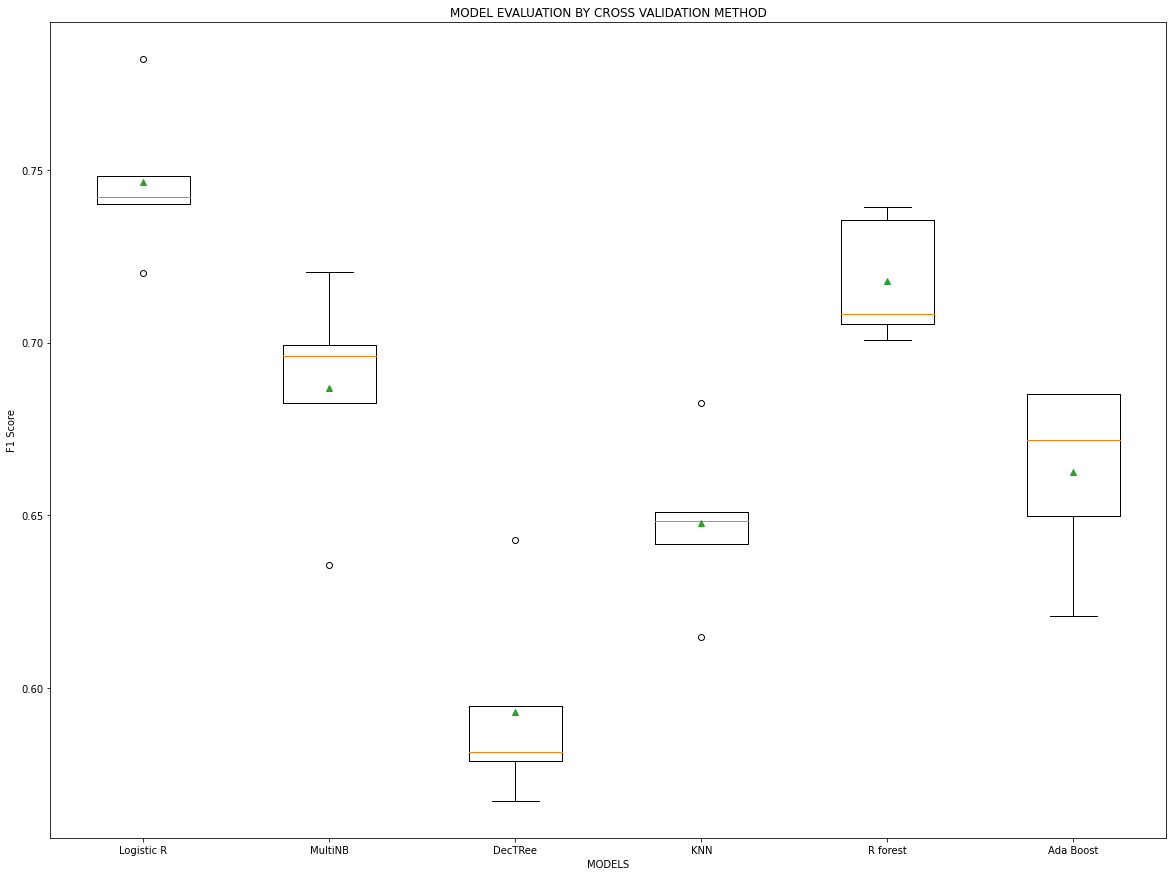

In [ ]:
# Using cross validation method to avoid overfitting
import statistics as st
vector = TfidfVectorizer()

x_train_v = vector.fit_transform(x_train)
x_test_v  = vector.transform(x_test)

# Model building
lr =LogisticRegression()
mnb=MultinomialNB()
dct=DecisionTreeClassifier(random_state=1)
knn=KNeighborsClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
m  =[lr,mnb,dct,knn,rf,ab]
model_name=['Logistic R','MultiNB','DecTRee','KNN','R forest','Ada Boost']

results, mean_results, p, f1_test=list(),list(),list(),list()


#Model fitting,cross-validating and evaluating performance

def algor(model):
    print('\n',i)
    pipe=Pipeline([('model',model)])
    pipe.fit(x_train_v,y_train)
    cv=StratifiedKFold(n_splits=5)
    n_scores=cross_val_score(pipe,x_train_v,y_train,scoring='f1_weighted',
                  cv=cv,n_jobs=-1,error_score='raise') 
    results.append(n_scores)
    mean_results.append(st.mean(n_scores))
    print('f1-Score(train): mean= (%.3f), min=(%.3f)) ,max= (%.3f),stdev= (%.3f)'%(st.mean(n_scores), min(n_scores),max(n_scores),np.std(n_scores)))
    y_pred=cross_val_predict(model,x_train_v,y_train,cv=cv)
    p.append(y_pred)
    f1=f1_score(y_train,y_pred, average = 'weighted')
    f1_test.append(f1)
    print('f1-Score(test): %.4f'%(f1))

for i in m:
    algor(i)


# Model comparison By Visualizing 

fig=plt.subplots(figsize=(20,15))
plt.title('MODEL EVALUATION BY CROSS VALIDATION METHOD')
plt.xlabel('MODELS')
plt.ylabel('F1 Score')
plt.boxplot(results,labels=model_name,showmeans=True)
plt.show()

In [ ]:
x=merged_data['clean_text']
y=merged_data['label']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)
model_lr_tf=LogisticRegression()

model_lr_tf.fit(x_train,y_train)
y_pred=model_lr_tf.predict(x_test)
# Model Evaluation
    
conf=confusion_matrix(y_test,y_pred)
acc_lr=accuracy_score(y_test,y_pred)
f1_lr=f1_score(y_test,y_pred,average='weighted')

print('Accuracy: ',acc_lr)
print('F1 Score: ',f1_lr)
print(10*'===========')
print('Confusion Matrix: \n',conf)
print(10*'===========')
print('Classification Report: \n',classification_report(y_test,y_pred))

Accuracy:  0.7341549295774648
F1 Score:  0.7347496724438446
Confusion Matrix: 
 [[181  69]
 [ 82 236]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71       250
           1       0.77      0.74      0.76       318

    accuracy                           0.73       568
   macro avg       0.73      0.73      0.73       568
weighted avg       0.74      0.73      0.73       568

